In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from yahoo_fin import stock_info as si
import numpy as np
import yfinance as yf
# import yahoo_fin


In [23]:
# help(si.get_holders)



In [24]:
sns.set_style('whitegrid')

In [25]:
%matplotlib inline

In [26]:
# %conda install -c anaconda requests

# help(si)
# !pip install yfinance

In [7]:
# si.get_holders()

In [27]:
def get_stock(ticker):
    return si.get_data(ticker)

STOCK = 'aapl'
START_DATE = '20200301'

stock = yf.Ticker(STOCK)

company_name = stock.info['longName']
print(company_name)

Apple Inc.


In [28]:
# si.get_holders(STOCK)

In [43]:


df = get_stock(STOCK)[['close']]
df = df.loc[START_DATE:]
df.head()


,close
2020-03-02,298.809998
2020-03-03,289.320007
2020-03-04,302.739990
2020-03-05,292.920013
2020-03-06,289.029999


In [38]:
df['shortEWM'] = df.close.ewm(span=12, adjust=False).mean()
df['longEWM'] = df.close.ewm(span=26, adjust=False).mean()
df['MACD'] = df.shortEWM - df.longEWM
df['signal'] = df.MACD.ewm(span=9,adjust=False).mean()
df['20_EMA'] = df.close.ewm(span=20,min_periods=0,adjust=False,ignore_na=False).mean()
df['50_EMA'] = df.close.ewm(span=50,min_periods=0,adjust=False,ignore_na=False).mean()
df['200_EMA'] = df.close.ewm(span=200,min_periods=0,adjust=False,ignore_na=False).mean()

AttributeError: 'Series' object has no attribute 'close'

In [39]:
def buy_sell(df):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(len(df)):
        if df['MACD'][i] > df['signal'][i]:
            Sell.append(np.NaN)
            if flag != 1:
                Buy.append(df['signal'][i])
                flag =1
            else:
                Buy.append(np.NaN)
        elif df['MACD'][i] < df['signal'][i]:
            Buy.append(np.NaN)
            if flag != 0:
                Sell.append(df['signal'][i])
                flag =0
            else:
                Sell.append(np.NaN)
        else:
            Sell.append(np.NaN)
            Buy.append(np.NaN)
    return Buy, Sell

In [40]:
BS = buy_sell(df)
df['Buy'] = BS[0]
df['Sell'] = BS[1]

KeyError: 'MACD'

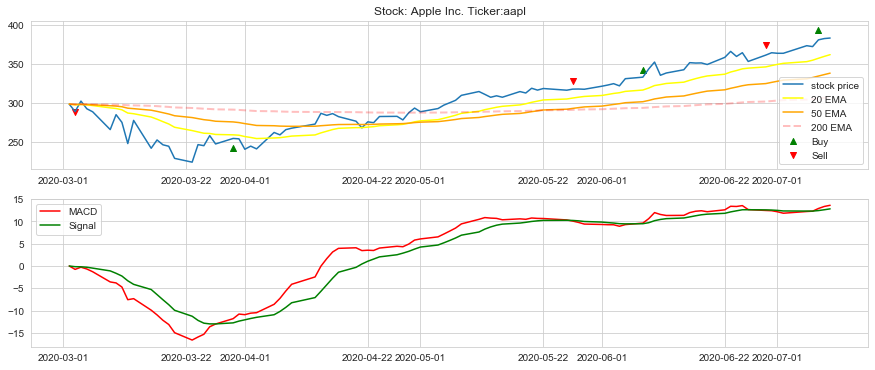

In [36]:
fig, ax = plt.subplots(2,figsize=(15,6))
ax[0].plot(df.index,df.close, label='stock price')
ax[0].plot(df.index, df['20_EMA'], label='20 EMA', color = 'yellow')
ax[0].plot(df.index, df['50_EMA'], label='50 EMA', color = 'orange')
ax[0].plot(df.index, df['200_EMA'], label='200 EMA', color = 'red', linestyle='--', linewidth=2, alpha=0.25)

ax[1].plot(df.index, df.MACD, c='r', label='MACD')
ax[1].plot(df.index, df.signal, c='g', label='Signal')

ax[0].scatter(df.index, df.Buy+df.close, c='g', marker="^",label='Buy')
ax[0].scatter(df.index, df.Sell+df.close, c='r', marker="v" ,label='Sell')

ax[0].set_title(f'Stock: {company_name} Ticker:{STOCK}')
ax[0].legend()
ax[1].legend()

In [34]:
df


,open,high,low,close,adjclose,volume,ticker,shortEWM,longEWM,MACD,signal,20_EMA,50_EMA,200_EMA,Buy,Sell
2020-03-02,282.279999,301.440002,277.720001,298.809998,298.003296,85349300.0,AAPL,298.809998,298.809998,0.000000,0.000000,298.809998,298.809998,298.809998,NaN,NaN
2020-03-03,303.670013,304.000000,285.799988,289.320007,288.538940,79868900.0,AAPL,297.349999,298.107035,-0.757036,-0.151407,297.906189,298.437841,298.715570,NaN,-0.151407
2020-03-04,296.440002,303.399994,293.130005,302.739990,301.922699,54794600.0,AAPL,298.179228,298.450217,-0.270989,-0.175324,298.366551,298.606553,298.755614,NaN,NaN
2020-03-05,295.519989,299.549988,291.410004,292.920013,292.129211,46893200.0,AAPL,297.370118,298.040572,-0.670454,-0.274350,297.847833,298.383551,298.697548,NaN,NaN
2020-03-06,282.000000,290.820007,281.230011,289.029999,288.249725,56544200.0,AAPL,296.087023,297.373123,-1.286099,-0.476700,297.008039,298.016745,298.601354,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,370.000000,375.779999,369.869995,373.850006,373.850006,29663900.0,AAPL,360.442556,348.204467,12.238089,12.337279,353.383349,331.375291,304.719629,NaN,NaN
2020-07-07,375.410004,378.619995,372.230011,372.690002,372.690002,28106100.0,AAPL,362.326779,350.018210,12.308568,12.331537,355.222078,332.995476,305.395951,NaN,NaN
2020-07-08,376.720001,381.500000,376.359985,381.369995,381.369995,29273000.0,AAPL,365.256504,352.340565,12.915939,12.448417,357.712356,334.892516,306.151912,12.448417,NaN
2020-07-09,385.049988,385.269989,378.690002,383.010010,383.010010,31410700.0,AAPL,367.987813,354.612376,13.375437,12.633821,360.121656,336.779476,306.916669,NaN,NaN


In [302]:
df

,open,high,low,close,adjclose,volume,ticker,shortEWM,longEWM,MACD,signal,Buy,Sell
2020-03-02,282.279999,301.440002,277.720001,298.809998,298.003296,85349300.0,AAPL,298.809998,298.809998,0.000000,0.000000,NaN,NaN
2020-03-03,303.670013,304.000000,285.799988,289.320007,288.538940,79868900.0,AAPL,297.349999,298.107035,-0.757036,-0.151407,NaN,-0.151407
2020-03-04,296.440002,303.399994,293.130005,302.739990,301.922699,54794600.0,AAPL,298.179228,298.450217,-0.270989,-0.175324,NaN,NaN
2020-03-05,295.519989,299.549988,291.410004,292.920013,292.129211,46893200.0,AAPL,297.370118,298.040572,-0.670454,-0.274350,NaN,NaN
2020-03-06,282.000000,290.820007,281.230011,289.029999,288.249725,56544200.0,AAPL,296.087023,297.373123,-1.286099,-0.476700,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,364.000000,372.380005,362.269989,366.529999,366.529999,53038900.0,AAPL,348.146831,334.733110,13.413721,12.151769,NaN,NaN
2020-06-24,365.000000,368.790009,358.519989,360.059998,360.059998,48155800.0,AAPL,349.979626,336.609176,13.370450,12.395505,NaN,NaN
2020-06-25,360.700012,365.000000,357.570007,364.839996,364.839996,34380600.0,AAPL,352.265837,338.700348,13.565489,12.629502,NaN,NaN
2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200.0,AAPL,352.475709,339.806248,12.669461,12.637494,NaN,NaN
